/var/folders/6g/03kjn0jj0f1gfscsfx7_n9l00000gn/T/ipykernel_64575/3817604454.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file,
/var/folders/6g/03kjn0jj0f1gfscsfx7_n9l00000gn/T/ipykernel_64575/3817604454.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file,
/var/folders/6g/03kjn0jj0f1gfscsfx7_n9l00000gn/T/ipykernel_64575/3817604454.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file,


Text(0, 0.5, 'Line Strength (cm$^2$/molecule)')

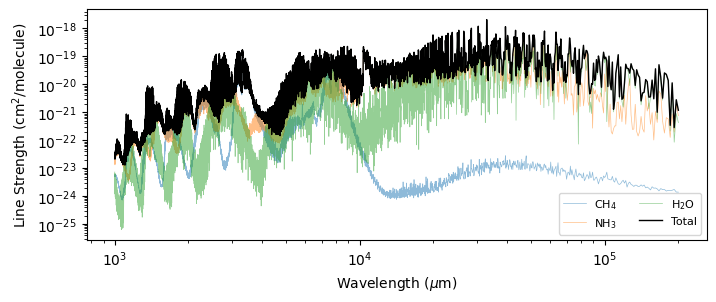

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file):
    data = pd.read_csv(file,
                    delim_whitespace=True,
                    header=None,
                    names = ['nu', 'sigma'])

    nu = data['nu']
    sigma = data['sigma']
    wav = 1e7 / nu

    return wav, sigma

files = ['12C-1H4_50-10000_1000K_1.000000.sigma', '14N-1H3_50-10000_1000K_1.000000.sigma', '1H2-16O_50-10000_1000K_1.000000.sigma']

s_total = np.zeros(9951)
s_list = []

for f in files:
    w, s = load_data(f)
    s_list.append(s)
    s_total += s

colors = ['C0', 'C1', 'C2']

plt.figure(figsize=(8,3))

for i in range(len(files)):
    plt.loglog(w, s_list[i], linewidth=0.5, alpha=0.5)

# Place titles inside the plots
plt.loglog(w, s_total,'k', linewidth=1, zorder=3)
plt.legend(['CH$_4$', 'NH$_3$', 'H$_2$O', 'Total'], fontsize=8, ncol=2)
plt.xlabel(r'Wavelength ($\mu$m)')
plt.ylabel('Line Strength (cm$^2$/molecule)')

In [36]:
import astropy.constants as c
import astropy.units as u
from grey_model import GreyModel

model = GreyModel(Teff=1000, include_molecules=False)
P, T, _, _ = model.load_opacities()

def column_density(P, T):
    n = P / (c.k_B*T)
    z = np.linspace(0,1,len(n)) * u.cm
    N = n*z
    return N.to_value(u.cm**-2)

N = column_density(P, T)

In [37]:
N

array([0.00000000e+00, 1.78021427e+42, 3.56153660e+42, 5.34522603e+42,
       7.13381324e+42, 8.93230462e+42, 1.07504807e+43, 1.26072563e+43,
       1.45389052e+43, 1.66145028e+43, 1.89647948e+43, 2.18359542e+43,
       2.56893061e+43, 3.13856207e+43, 4.05242330e+43, 5.60637607e+43,
       8.34499550e+43, 1.32642573e+44, 2.21694946e+44, 3.82900342e+44,
       6.72883795e+44, 1.02245341e+45, 1.03505058e+45, 1.02853255e+45,
       1.00071712e+45, 9.53401081e+44, 8.91866478e+44, 8.22585512e+44,
       7.51092216e+44, 6.81147205e+44, 6.14896550e+44, 5.53361778e+44,
       4.96885796e+44, 4.45437688e+44, 3.98795727e+44, 3.56650019e+44,
       3.18657844e+44, 2.84472677e+44, 2.53758968e+44, 2.26199306e+44,
       2.01497545e+44, 1.79379767e+44, 1.59594110e+44, 1.41909979e+44,
       1.26116951e+44, 1.12023532e+44, 9.94558534e+43, 8.82563640e+43,
       7.82825573e+43, 6.94057425e+43])

In [33]:
tau = s_total * 1e20
np.exp(-tau)

0       0.888602
1       0.755642
2       0.972146
3       0.324658
4       0.966483
          ...   
9946    0.997340
9947    0.997594
9948    0.997646
9949    0.997671
9950    0.996729
Name: sigma, Length: 9951, dtype: float64